In [1]:
#import packages
import pandas as pd
import numpy as np

#to plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10


In [2]:
#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [49]:
#read the file
df = pd.read_csv('NSE-TATAGLOBAL.csv')

#print the head
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2019-01-04,210.60,214.90,210.00,213.50,213.80,1213181.0,2583.05
1,2019-01-03,214.95,215.35,209.90,210.55,210.05,2096553.0,4433.50
2,2019-01-02,219.00,220.35,213.60,214.20,214.60,1081778.0,2340.31
3,2019-01-01,219.95,221.05,218.05,218.95,219.10,716275.0,1571.63
4,2018-12-31,222.00,223.65,218.85,219.55,219.40,965858.0,2131.09


In [50]:
#setting index as date
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

In [51]:
df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,,
2019-01-04,2019-01-04,210.60,214.90,210.00,213.50,213.80,1213181.0,2583.05
2019-01-03,2019-01-03,214.95,215.35,209.90,210.55,210.05,2096553.0,4433.50
2019-01-02,2019-01-02,219.00,220.35,213.60,214.20,214.60,1081778.0,2340.31
2019-01-01,2019-01-01,219.95,221.05,218.05,218.95,219.10,716275.0,1571.63
2018-12-31,2018-12-31,222.00,223.65,218.85,219.55,219.40,965858.0,2131.09
2018-12-28,2018-12-28,221.75,223.30,219.55,220.75,220.80,2263147.0,5006.86
2018-12-27,2018-12-27,221.80,224.90,215.20,220.10,220.05,9509683.0,20912.50
2018-12-26,2018-12-26,220.40,220.40,212.40,217.95,218.55,1598566.0,3456.42
2018-12-24,2018-12-24,215.55,224.00,215.40,219.05,219.05,5808490.0,12802.57


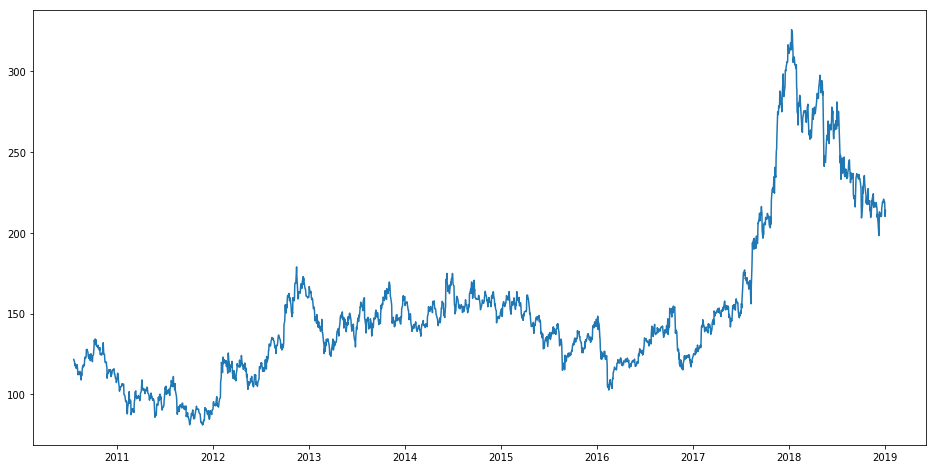

In [52]:
#plot
plt.figure(figsize=(16,8))
plt.plot(df['Close'], label='Close Price history')

In [53]:
#creating dataframe with date and the target variable
data = df.sort_index(ascending=True, axis=0)
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,,
2010-07-21,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666.0,803.56
2010-07-22,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312.0,355.17
2010-07-23,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312.0,340.31
2010-07-26,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440.0,780.01
2010-07-27,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100.0,694.98


In [54]:
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])
new_data.head()

,Date,Close
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN


In [55]:
new_data.index = data['Date'] #considering the date column has been set to datetime format


In [56]:
for i in range(0,len(data)):
     new_data['Date'][i] = data['Date'][i]
     new_data['Close'][i] = data['Close'][i]

In [57]:
new_data.head()

,Date,Close
Date,,
2010-07-21,2010-07-21 00:00:00,121.55
2010-07-22,2010-07-22 00:00:00,120.9
2010-07-23,2010-07-23 00:00:00,120.65
2010-07-26,2010-07-26 00:00:00,117.6
2010-07-27,2010-07-27 00:00:00,118.65


While splitting the data into train and validation, we cannot use random splitting since that will destroy the time component. So here I have set the last year’s data into validation and the 4 years’ data before that into train.

In [58]:
#splitting into train and validation
train = new_data[:1850]
valid = new_data[1850:]

In [59]:
train

,Date,Close
Date,,
2010-07-21,2010-07-21 00:00:00,121.55
2010-07-22,2010-07-22 00:00:00,120.9
2010-07-23,2010-07-23 00:00:00,120.65
2010-07-26,2010-07-26 00:00:00,117.6
2010-07-27,2010-07-27 00:00:00,118.65
2010-07-28,2010-07-28 00:00:00,118.25
2010-07-29,2010-07-29 00:00:00,116.6
2010-07-30,2010-07-30 00:00:00,116.05
2010-08-02,2010-08-02 00:00:00,117.3


In [60]:
valid

,Date,Close
Date,,
2018-01-01,2018-01-01 00:00:00,312.9
2018-01-02,2018-01-02 00:00:00,311.15
2018-01-03,2018-01-03 00:00:00,311.2
2018-01-04,2018-01-04 00:00:00,312.25
2018-01-05,2018-01-05 00:00:00,312.95
2018-01-08,2018-01-08 00:00:00,317.6
2018-01-09,2018-01-09 00:00:00,315.3
2018-01-10,2018-01-10 00:00:00,314.1
2018-01-11,2018-01-11 00:00:00,313.3


In [61]:
new_data.shape, train.shape, valid.shape


((2100, 2), (1850, 2), (250, 2))

In [62]:
train['Date'].min(), train['Date'].max(), valid['Date'].min(), valid['Date'].max()

(Timestamp('2010-07-21 00:00:00'),
 Timestamp('2017-12-29 00:00:00'),
 Timestamp('2018-01-01 00:00:00'),
 Timestamp('2019-01-04 00:00:00'))

In [63]:
valid.head()

,Date,Close
Date,,
2018-01-01,2018-01-01 00:00:00,312.9
2018-01-02,2018-01-02 00:00:00,311.15
2018-01-03,2018-01-03 00:00:00,311.2
2018-01-04,2018-01-04 00:00:00,312.25
2018-01-05,2018-01-05 00:00:00,312.95


In [64]:
train.head()

,Date,Close
Date,,
2010-07-21,2010-07-21 00:00:00,121.55
2010-07-22,2010-07-22 00:00:00,120.9
2010-07-23,2010-07-23 00:00:00,120.65
2010-07-26,2010-07-26 00:00:00,117.6
2010-07-27,2010-07-27 00:00:00,118.65


In [69]:
#make predictions
preds = []
for i in range(0,250):
    a = train['Close'][len(train)-250+i:].sum() + sum(preds)
    b = a/250
    preds.append(b)

In [70]:
#calculate rmse
rms=np.sqrt(np.mean(np.power((np.array(valid['Close'])-preds),2)))
rms

64.31903610147509

C:\Users\dell\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\dell\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


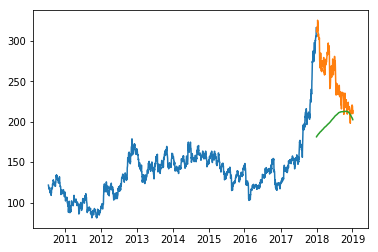

In [71]:
#plot
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])

## Linear Regression

In [72]:
#setting index as date values
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

#sorting
data = df.sort_index(ascending=True, axis=0)

#creating a separate dataset
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

In [73]:
#create features
import re
def add_datepart(df, fldname, drop=True, time=False):
    "Helper function that adds columns relevant to a date."
    fld = df[fldname]
    fld_dtype = fld.dtype
    if isinstance(fld_dtype, pd.core.dtypes.dtypes.DatetimeTZDtype):
        fld_dtype = np.datetime64

    if not np.issubdtype(fld_dtype, np.datetime64):
        df[fldname] = fld = pd.to_datetime(fld, infer_datetime_format=True)
    targ_pre = re.sub('[Dd]ate$', '', fldname)
    attr = ['Year', 'Month', 'Week', 'Day', 'Dayofweek', 'Dayofyear',
            'Is_month_end', 'Is_month_start', 'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start']
    if time: attr = attr + ['Hour', 'Minute', 'Second']
    for n in attr: df[targ_pre + n] = getattr(fld.dt, n.lower())
    df[targ_pre + 'Elapsed'] = fld.astype(np.int64) // 10 ** 9
    if drop: df.drop(fldname, axis=1, inplace=True)
add_datepart(new_data, 'Date')


In [74]:
new_data.head()

,Close,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Elapsed
0,121.55,2010,7,29,21,2,202,False,False,False,False,False,False,1279670400
1,120.9,2010,7,29,22,3,203,False,False,False,False,False,False,1279756800
2,120.65,2010,7,29,23,4,204,False,False,False,False,False,False,1279843200
3,117.6,2010,7,30,26,0,207,False,False,False,False,False,False,1280102400
4,118.65,2010,7,30,27,1,208,False,False,False,False,False,False,1280188800


In [75]:
new_data.drop('Elapsed', axis=1, inplace=True)  #elapsed will be the time stamp

In [76]:
new_data.head()

,Close,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start
0,121.55,2010,7,29,21,2,202,False,False,False,False,False,False
1,120.9,2010,7,29,22,3,203,False,False,False,False,False,False
2,120.65,2010,7,29,23,4,204,False,False,False,False,False,False
3,117.6,2010,7,30,26,0,207,False,False,False,False,False,False
4,118.65,2010,7,30,27,1,208,False,False,False,False,False,False


In [77]:
new_data['mon_fri'] = 0
for i in range(0,len(new_data)):
    if (new_data['Dayofweek'][i] == 0 or new_data['Dayofweek'][i] == 4):
        new_data['mon_fri'][i] = 1
    else:
        new_data['mon_fri'][i] = 0

C:\Users\dell\Anaconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\dell\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [78]:
new_data.head()

,Close,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,mon_fri
0,121.55,2010,7,29,21,2,202,False,False,False,False,False,False,0
1,120.9,2010,7,29,22,3,203,False,False,False,False,False,False,0
2,120.65,2010,7,29,23,4,204,False,False,False,False,False,False,1
3,117.6,2010,7,30,26,0,207,False,False,False,False,False,False,1
4,118.65,2010,7,30,27,1,208,False,False,False,False,False,False,0


In [79]:
#split into train and validation
train = new_data[:1850]
valid = new_data[1850:]

In [80]:
x_train = train.drop('Close', axis=1)
y_train = train['Close']
x_valid = valid.drop('Close', axis=1)
y_valid = valid['Close']

In [81]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [82]:
#make predictions and find the rmse
preds = model.predict(x_valid)
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
rms

87.67879801824253

The RMSE value is higher than the previous technique, which clearly shows that linear regression has performed poorly. Let’s look at the plot and understand why linear regression has not done well:

C:\Users\dell\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\dell\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


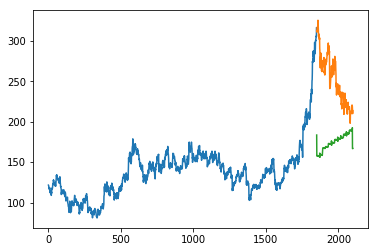

In [84]:
#plot
valid['Predictions'] = 0
valid['Predictions'] = preds

valid.index = new_data[1850:].index
train.index = new_data[:1850].index

plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])

### Inference

Linear regression is a simple technique and quite easy to interpret, but there are a few obvious disadvantages. One problem in using regression algorithms is that the model overfits to the date and month column. Instead of taking into account the previous values from the point of prediction, the model will consider the value from the same date a month ago, or the same date/month a year ago.

## K-Nearest Neighbors

In [85]:
#importing libraries
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [86]:
#scaling data
x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)
x_valid_scaled = scaler.fit_transform(x_valid)
x_valid = pd.DataFrame(x_valid_scaled)

In [87]:
#using gridsearch to find the best parameter
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
knn = neighbors.KNeighborsRegressor()
model = GridSearchCV(knn, params, cv=5)

In [88]:
#fit the model and make predictions
model.fit(x_train,y_train)
preds = model.predict(x_valid)

In [89]:
#rmse
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
rms

150.31745055932885

C:\Users\dell\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\dell\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


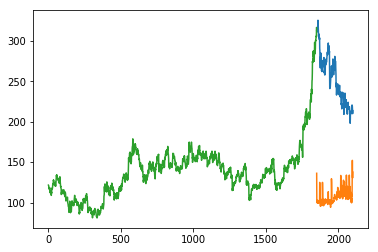

In [90]:
#plot
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.plot(valid[['Close', 'Predictions']])
plt.plot(train['Close'])

### Inference

The RMSE value is almost similar to the linear regression model and the plot shows the same pattern. Like linear regression, kNN also identified a drop in January 2018 since that has been the pattern for the past years. We can safely say that regression algorithms have not performed well on this dataset.

## Auto ARIMA

ARIMA is a very popular statistical method for time series forecasting. ARIMA models take into account the past values to predict the future values. There are three important parameters in ARIMA:

    p (past values used for forecasting the next value)
    q (past forecast errors used to predict the future values)
    d (order of differencing)

Parameter tuning for ARIMA consumes a lot of time. So I will use auto ARIMA which automatically selects the best combination of (p,q,d) that provides the least error.

In [91]:
from pyramid.arima import auto_arima

In [92]:
data = df.sort_index(ascending=True, axis=0)

train = data[:1850]
valid = data[1850:]

training = train['Close']
validation = valid['Close']


In [93]:
model = auto_arima(training, start_p=1, start_q=1,max_p=3, max_q=3, m=12,start_P=0, seasonal=True,d=1, D=1, trace=True,error_action='ignore',suppress_warnings=True)
model.fit(training)

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=9144.323, BIC=9171.903, Fit time=15.274 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=10422.126, BIC=10433.158, Fit time=0.193 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=9876.577, BIC=9898.641, Fit time=2.397 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=9142.354, BIC=9164.418, Fit time=10.210 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=9141.201, BIC=9168.780, Fit time=10.504 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 0, 12); AIC=9876.592, BIC=9898.655, Fit time=2.376 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=9146.012, BIC=9179.108, Fit time=21.187 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=10423.975, BIC=10440.522, Fit time=0.491 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(2, 1, 2, 12); AIC=9143.273, BIC=9181.884, Fit time=27.250 seconds
Fit ARIMA: order=(1

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(0, 1, 0),
   out_of_sample_size=0, scoring='mse', scoring_args={},
   seasonal_order=(1, 1, 1, 12), solver='lbfgs', start_params=None,
   suppress_warnings=True, transparams=True, trend='c')

In [95]:
forecast = model.predict(n_periods=250)
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Prediction'])

In [96]:
rms=np.sqrt(np.mean(np.power((np.array(valid['Close'])-np.array(forecast['Prediction'])),2)))
rms

125.05585045958475

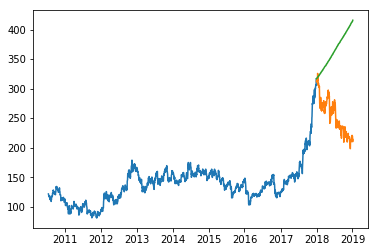

In [97]:
#plot
plt.plot(train['Close'])
plt.plot(valid['Close'])
plt.plot(forecast['Prediction'])

### Inference

Although the predictions using this technique are far better than that of the previously implemented machine learning models, these predictions are still not close to the real values.

## Prophet

In [98]:
#importing prophet
from fbprophet import Prophet


In [99]:
#creating dataframe
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

In [100]:
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

In [101]:
new_data['Date'] = pd.to_datetime(new_data.Date,format='%Y-%m-%d')
new_data.index = new_data['Date']


In [102]:
#preparing data
new_data.rename(columns={'Close': 'y', 'Date': 'ds'}, inplace=True)

In [103]:
#train and validation
train = new_data[:1850]
valid = new_data[1850:]

In [104]:
#fit the model
model = Prophet()
model.fit(train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\dell\Anaconda\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [105]:
#predictions
close_prices = model.make_future_dataframe(periods=len(valid))
forecast = model.predict(close_prices)

In [106]:
#rmse
forecast_valid = forecast['yhat'][1850:]
rms=np.sqrt(np.mean(np.power((np.array(valid['y'])-np.array(forecast_valid)),2)))
rms

45.63749164851375

C:\Users\dell\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\dell\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


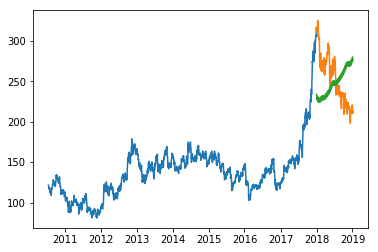

In [107]:
#plot
valid['Predictions'] = 0
valid['Predictions'] = forecast_valid.values

plt.plot(train['y'])
plt.plot(valid[['y', 'Predictions']])

### Inference

Prophet (like most time series forecasting techniques) tries to capture the trend and seasonality from past data. This model usually performs well on time series datasets, but fails to live up to it’s reputation in this case.

## Long Short Term Memory

In [109]:
#importing required libraries
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

Using TensorFlow backend.


In [110]:
#creating dataframe
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

In [111]:
#setting index
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)


In [112]:
#creating train and test sets
dataset = new_data.values

In [113]:
train = dataset[0:1850,:]
valid = dataset[1850:,:]

In [114]:
#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))


C:\Users\dell\Anaconda\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [115]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

Epoch 1/1
 - 98s - loss: 0.0010


In [116]:

inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

In [117]:
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
rms

9.216764000553546

C:\Users\dell\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


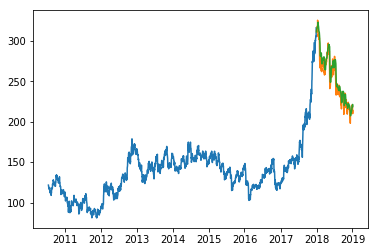

In [118]:
#for plotting
train = new_data[:1850]
valid = new_data[1850:]
valid['Predictions'] = closing_price
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])

### Inference

Wow! LSTM has easily outshone any algorithm we saw so far. The LSTM model can be tuned for various parameters such as changing the number of LSTM layers, adding dropout value or increasing the number of epochs. But are the predictions from LSTM enough to identify whether the stock price will increase or decrease? Certainly not!

Stock price is affected by the news about the company and other factors like demonetization or merger/demerger of the companies. There are certain intangible factors as well which can often be impossible to predict beforehand.